In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

In [4]:
data = pd.read_csv('data.txt',sep='|')
data

,date,gdp,consumption,invest,government,dpi,cpi,m1,tbill,unemp,population,inflation,interest
0,1950 Q1,1610.5,1058.9,198.1,361.0,1186.1,70.6,110.20,1.12,6.4,149.461,NaN,NaN
1,1950 Q2,1658.8,1075.9,220.4,366.4,1178.1,71.4,111.75,1.17,5.6,150.260,4.5071,-3.3404
2,1950 Q3,1723.0,1131.0,239.7,359.6,1196.5,73.2,112.95,1.23,4.6,151.064,9.9590,-8.7290
3,1950 Q4,1753.9,1097.6,271.8,382.5,1210.0,74.9,113.93,1.35,4.2,151.871,9.1834,-7.8301
4,1951 Q1,1773.5,1122.8,242.9,421.9,1207.9,77.3,115.08,1.40,3.5,152.393,12.6160,-11.2160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1999 Q4,9049.9,6083.6,1725.4,1564.8,6379.2,504.1,1124.80,5.06,4.1,272.691,0.9533,4.1067
200,2000 Q1,9102.5,6171.7,1722.9,1560.4,6431.6,512.8,1113.70,5.54,4.0,274.848,6.8445,-1.3012
201,2000 Q2,9229.4,6226.3,1801.6,1577.2,6523.7,516.5,1105.30,5.78,4.0,277.022,2.8758,2.9009
202,2000 Q3,9260.1,6292.1,1788.8,1570.0,6566.5,520.3,1096.00,6.03,4.1,279.213,2.9321,3.0979


In [5]:
data['date'] = data['date'].str.replace('Q1','01')
data['date'] = data['date'].str.replace('Q2','04')
data['date'] = data['date'].str.replace('Q3','07')
data['date'] = data['date'].str.replace('Q4','10')
data['date'] = pd.to_datetime(data.date, format='%Y %m', errors='coerce')
data

,date,gdp,consumption,invest,government,dpi,cpi,m1,tbill,unemp,population,inflation,interest
0,1950-01-01,1610.5,1058.9,198.1,361.0,1186.1,70.6,110.20,1.12,6.4,149.461,NaN,NaN
1,1950-04-01,1658.8,1075.9,220.4,366.4,1178.1,71.4,111.75,1.17,5.6,150.260,4.5071,-3.3404
2,1950-07-01,1723.0,1131.0,239.7,359.6,1196.5,73.2,112.95,1.23,4.6,151.064,9.9590,-8.7290
3,1950-10-01,1753.9,1097.6,271.8,382.5,1210.0,74.9,113.93,1.35,4.2,151.871,9.1834,-7.8301
4,1951-01-01,1773.5,1122.8,242.9,421.9,1207.9,77.3,115.08,1.40,3.5,152.393,12.6160,-11.2160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1999-10-01,9049.9,6083.6,1725.4,1564.8,6379.2,504.1,1124.80,5.06,4.1,272.691,0.9533,4.1067
200,2000-01-01,9102.5,6171.7,1722.9,1560.4,6431.6,512.8,1113.70,5.54,4.0,274.848,6.8445,-1.3012
201,2000-04-01,9229.4,6226.3,1801.6,1577.2,6523.7,516.5,1105.30,5.78,4.0,277.022,2.8758,2.9009
202,2000-07-01,9260.1,6292.1,1788.8,1570.0,6566.5,520.3,1096.00,6.03,4.1,279.213,2.9321,3.0979


### Compute first differences and look at some distributions

In [6]:
data['consumption_diff'] = data['consumption'].diff()
data['unemp_diff'] = data['unemp'].diff()
data['dpi_diff'] = data['dpi'].diff()

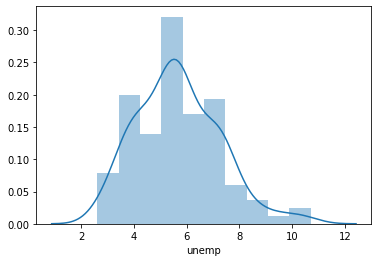

In [65]:
sns.distplot(data['unemp_diff'])

### What the time series looks like

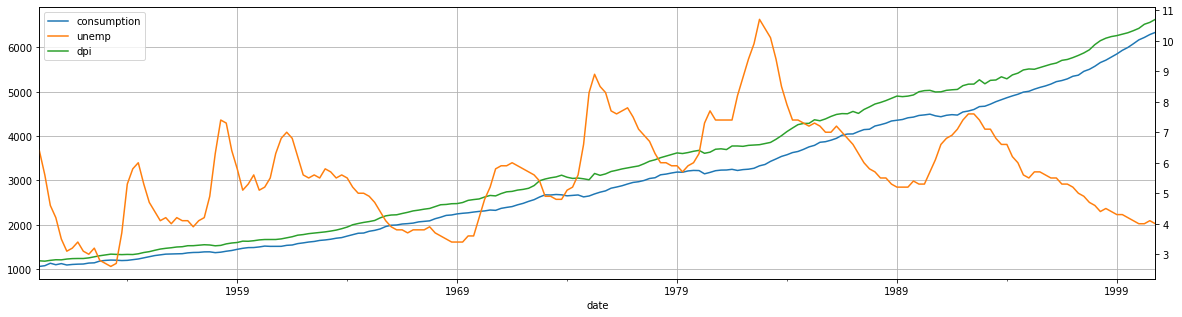

In [69]:
data.set_index('date')[['consumption','unemp','dpi']].plot(secondary_y=['unemp'], mark_right=False, figsize = (20,5), grid=True)

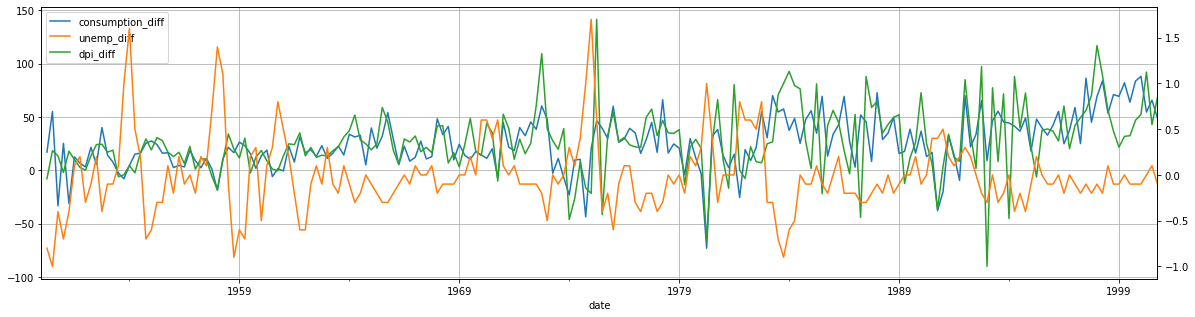

In [70]:
data.set_index('date')[['consumption_diff','unemp_diff','dpi_diff']].plot(secondary_y=['unemp_diff'], mark_right=False, figsize = (20,5), grid=True)

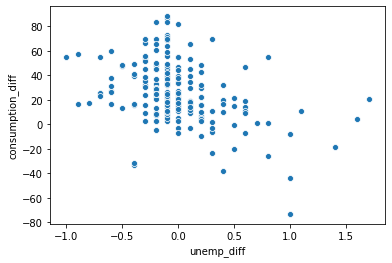

In [8]:
sns.scatterplot(x='unemp_diff', y='consumption_diff',data=data)

In [71]:
## any NaNs other than the first entry in time series?
data.isna().sum()

date                0
gdp                 0
consumption         0
invest              0
government          0
dpi                 0
cpi                 0
m1                  0
tbill               0
unemp               0
population          0
inflation           1
interest            1
consumption_diff    1
unemp_diff          1
dpi_diff            1
dtype: int64

In [74]:
### How promising is the data for linear regression? Glimpse of correlation matrix

In [73]:
corr = data[['consumption_diff', 'unemp_diff','dpi_diff']].corr()
corr

,consumption_diff,unemp_diff,dpi_diff
consumption_diff,1.000000,-0.387779,0.524762
unemp_diff,-0.387779,1.000000,-0.295534
dpi_diff,0.524762,-0.295534,1.000000


# 1. Linear regression

In [67]:
## Linear regression
# D() denotes first differences, \alpha the intercept, and \beta1 and \beta2 the slope coefficients 
# of the respective independent variables. \epsilont are the residuals.

# Let's have a first look with sklearn, then statsmodel
from sklearn.linear_model import LinearRegression

df = data.dropna()

X = df[['unemp_diff','dpi_diff']].to_numpy()
y = df['consumption_diff'].to_numpy()

reg = LinearRegression().fit(X, y)
print('coeff unemp, dpi', reg.coef_)
print('intercept', reg.intercept_)

coeff unemp, dpi [-16.01488596   0.35566679]
intercept 16.28476400141684


In [13]:
reg.score(X, y)

0.33470312951307557

### ... looks about alright, but let's take a deeper look using statsmodel to get all the parameters

In [14]:
import statsmodels.api as sm
from scipy import stats

# using ordinary least squares (OLS)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     50.31
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           2.00e-18
Time:                        22:12:08   Log-Likelihood:                -898.12
No. Observations:                 203   AIC:                             1802.
Df Residuals:                     200   BIC:                             1812.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2848      1.911      8.522      0.0

In [15]:
# p-values too small to be displayed, let's have closer look separately

p_values = est2.summary2().tables[1]['P>|t|']
p_values

const    3.785079e-15
x1       3.656540e-05
x2       2.844072e-12
Name: P>|t|, dtype: float64

### Accuracy: so so, R-squared and AIC do not indicate high accuracy but then again, from the time series plot and corr coefficients one can already guess little correlation of unemployment with consumption...

# 2. Outliers

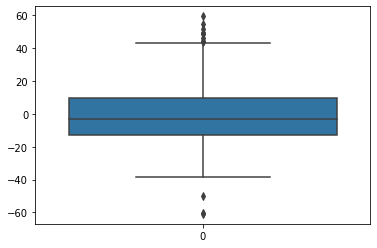

In [19]:
from matplotlib.cbook import boxplot_stats

sns.boxplot(data=est2.resid) # --> seaborn boxplot plots Tukey's test requirement

In [87]:
outliers = [y for stat in boxplot_stats(est2.resid) for y in stat['fliers']]
print('Overall number of outliers:', len(outliers))
print(sorted(outliers))

Overall number of outliers: 12
[-60.892219989432625, -60.45715384610565, -49.88917015985109, 43.73134483388181, 44.12694138660625, 46.431242135702526, 48.560840730420864, 49.037477263957705, 49.068541836571086, 51.57680783716769, 54.505032216263004, 59.37398336493196]


### For the fun of it, let's compute it also by hand

In [83]:
from statistics import median

def compute_tukey_boundaries(values):
    values = sorted(values)
    midpoint = int(round(len(values) / 2.0))
    q1 = median(values[:midpoint]) # Q_0.25
    q3 = median(values[midpoint:]) # Q_0.75
    iqr = q3 - q1
    lower = q1 - (iqr * 1.5)
    upper = q3 + (iqr * 1.5)
    print('outlier below', lower)
    print('outlier above', upper,'\n')
    return [i for i in values if i < lower] + [i for i in values if i > upper]

In [88]:
outliers_tukey = compute_tukey_boundaries(est2.resid)
print('Overall number of outliers:', len(outliers_tukey))
print(sorted(outliers_tukey))

outlier below -46.30910239529774
outlier above 43.421229534069 

Overall number of outliers: 12
[-60.892219989432625, -60.45715384610565, -49.88917015985109, 43.73134483388181, 44.12694138660625, 46.431242135702526, 48.560840730420864, 49.037477263957705, 49.068541836571086, 51.57680783716769, 54.505032216263004, 59.37398336493196]


In [89]:
len(outliers_tukey)/len(est2.resid)

0.059113300492610835

### 12 outliers in 203 data points (6%), let's have a closer look:

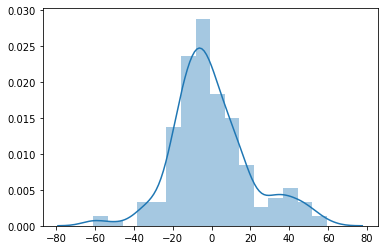

In [86]:
sns.distplot(est2.resid)

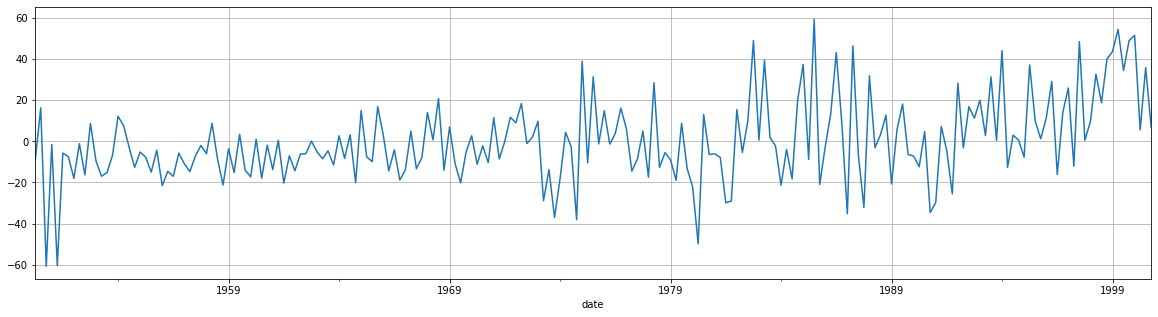

In [85]:
test_df = data[['date','consumption_diff','unemp_diff','dpi_diff']].dropna()
test_df['resid'] = est2.resid
test_df.set_index('date')['resid'].plot(figsize = (20,5), grid=True)

In [109]:
import statsmodels.stats.api as sms

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(est2.resid, est2.model.exog)
print(dict(zip(name, test)))

{'Lagrange multiplier statistic': 6.291319285392931, 'p-value': 0.04303852463268705, 'f-value': 3.1982926541613184, 'f p-value': 0.042928802672227394}


In [110]:
# --> p-value < 0.05 --> heteroscedastic distribution of residuals

In [92]:
# which are the outliers?
test_df[test_df.resid.isin(outliers_tukey)]

,date,consumption_diff,unemp_diff,dpi_diff,resid
3,1950-10-01,-33.4,-0.4,13.5,-60.892220
5,1951-04-01,-31.4,-0.4,17.9,-60.457154
121,1980-04-01,-73.2,1.0,-66.3,-49.889170
131,1982-10-01,55.0,0.8,7.0,49.037477
142,1985-07-01,69.4,-0.1,-22.1,59.373983
149,1987-04-01,51.8,-0.3,-44.2,46.431242
176,1994-01-01,44.3,0.0,-45.3,44.126941
190,1997-07-01,86.4,-0.1,56.1,48.560841
196,1999-01-01,69.3,-0.1,21.6,43.731345
197,1999-04-01,82.1,0.0,31.8,54.505032


### Addressing outliers:
1. understand why they are there --> keep or drop? Really depends on the initial problem. With issues such as data coming from different data sources without unknown associated uncertainties it may be better to omit them. For this problem, perhaps omitting the first two outliers may be justified but not the ones starting from 1980
2. More generally, review choice of input features. If that is fixed, possibility to transform response variable (use some log or sqrt etc.) or use weights for regression (weight to each data point based on the variance of its fitted value)


# 3. Autocorrelation of Residuals
Durbin-Watson test statistic tests the null hypothesis that the residuals from an
ordinary least-squares regression are not autocorrelated against the alternative that the
residuals follow an autocorrelated process at lag 1 or higher. The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation. 

### ... from OLS summary

In [64]:
est2.summary2().tables[2][[2,3]]

,2,3
0,Durbin-Watson:,1.767
1,Jarque-Bera (JB):,14.257
2,Prob(JB):,0.001
3,Condition No.:,110


### for this case here this means low-level positive autocorrelation which can also be seen in the time series and dist plot of the residuals above. Ideally (null residual), the points are randomly scattered with an approximately constant bandwidth (variance) around the identity line (zero). In this case one can observe an offset in residuals in recent years as well as increasing variance (some heteroscedastic tendency).

# 4. Bootstrapping std errors

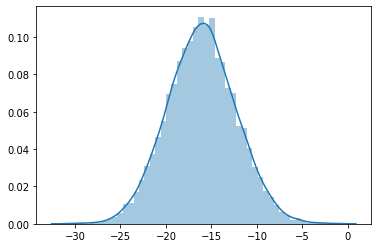

In [49]:
y_pred = est2.predict(X2)

boot2_slope1 = []
boot2_slope2 = []
boot2_interc = []
n_boots = 10000

for _ in range(n_boots):
 # create a sampling of the residuals with replacement
    boot_resids = np.random.choice(est2.resid, len(X), replace=True)
    y_temp = [y_pred_i + resid_i for y_pred_i, resid_i in zip(y_pred, boot_resids)]
 
    # Fit a linear regression
    X2 = sm.add_constant(X)
    ols_model_temp = sm.OLS(y_temp, X2)
    results_temp = ols_model_temp.fit()
 
    # get coefficients
    boot2_interc.append(results_temp.params[0])
    boot2_slope1.append(results_temp.params[1])
    boot2_slope2.append(results_temp.params[2])
    #print(results_temp.params)
    
sns.distplot(boot2_slope1)

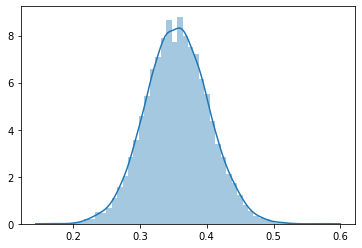

In [51]:
sns.distplot(boot2_slope2)

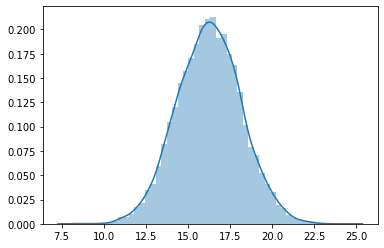

In [52]:
sns.distplot(boot2_interc)
plt.show()

In [60]:
print('const   ',np.std(boot2_interc))
print('x1      ',np.std(boot2_slope1))
print('x2      ',np.std(boot2_slope2))

const    1.9033951128877167
x1       3.76452954655696
x2       0.04707111586671635


### ... compared to the values from the fit

In [57]:
est2.summary2().tables[1]['Std.Err.']

const    1.910841
x1       3.792157
x2       0.047779
Name: Std.Err., dtype: float64

In [98]:
print('relative decrease in std. err')
print('const   ',100*round(1 - np.std(boot2_interc)/est2.summary2().tables[1]['Std.Err.'].iloc[0],4), '%')
print('x1      ',100*round(1 - np.std(boot2_slope1)/est2.summary2().tables[1]['Std.Err.'].iloc[1],4),'%')
print('x2      ',100*round(1 - np.std(boot2_slope2)/est2.summary2().tables[1]['Std.Err.'].iloc[2],4),'%')

relative decrease in std. err
const    0.38999999999999996 %
x1       0.73 %
x2       1.48 %


### Bootstrapping decreased standard errors slightly, robust error estimation works quite well, i.e. underlying distribution of regression parameters is indeed fairly normal